In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

In [2]:
df=pd.read_csv(r'E:\user\snappfood qualiftying\source\data\raw data\Data analyst Task.csv')

In [3]:
df.isnull().sum()

order_id             0
user_id              0
created_at           0
discount_cost        0
discount_type    22132
basket               0
dtype: int64

In [7]:
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,NaN,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,NaN,15000
4,5,5,11/10/2021,10000,1.0,16000


In [4]:
import dateutil
from datetime import datetime as dt
from pytz import utc

df['datetime'] = df['created_at'].apply(lambda x: dateutil.parser.parse(x).timestamp())
df['month'] = df['datetime'].apply(lambda x: dt.fromtimestamp(x, utc).month)
df['day'] = df['datetime'].apply(lambda x: dt.fromtimestamp(x, utc).day)
df['year'] = df['datetime'].apply(lambda x: dt.fromtimestamp(x, utc).year)
print(df)

       order_id  user_id  created_at  discount_cost  discount_type  basket  \
0             1        1   4/12/2021          10000            1.0   12000   
1             2        2    5/9/2021              0            NaN   20000   
2             3        3    5/9/2021          10000            1.0   14000   
3             4        4  11/10/2021              0            NaN   15000   
4             5        5  11/10/2021          10000            1.0   16000   
...         ...      ...         ...            ...            ...     ...   
29052     29053     6622   7/31/2022              0            NaN   18000   
29053     29054     9985   7/31/2022              0            NaN   25000   
29054     29055     8843   7/31/2022           6000            1.0   24000   
29055     29056     8703   7/31/2022              0            NaN   40000   
29056     29057     4424   7/31/2022              0            NaN   17000   

           datetime  month  day  year  
0      1.618169e+09    

In [5]:
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,datetime,month,day,year
0,1,1,4/12/2021,10000,1.0,12000,1.618169e+09,4,11,2021
1,2,2,5/9/2021,0,NaN,20000,1.620502e+09,5,8,2021
2,3,3,5/9/2021,10000,1.0,14000,1.620502e+09,5,8,2021
3,4,4,11/10/2021,0,NaN,15000,1.636490e+09,11,9,2021
4,5,5,11/10/2021,10000,1.0,16000,1.636490e+09,11,9,2021


In [14]:
df['cohort'] = df.apply(lambda row: ((row['year']-2020) * 52) + (row['month']*4)+(row['week']), axis=1)
cohorts = df.groupby('user_id')['cohort'].min().reset_index()
print(cohorts)
cohorts.columns = ['user_id', 'first_cohort']
df = df.merge(cohorts, on='user_id', how='left')

      user_id  cohort
0           1      83
1           2      90
2           3      90
3           4     126
4           5     111
...       ...     ...
9980     9981     162
9981     9982     162
9982     9983     162
9983     9984     162
9984     9985     162

[9985 rows x 2 columns]


In [15]:
headers = df['cohort'].value_counts().reset_index()
headers.columns = ['cohort', 'count']
headers = headers.sort_values(['cohort'])['cohort'].to_list()

In [16]:
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,datetime,month,day,year,week,cohort,first_cohort
0,1,1,4/12/2021,10000,1.0,12000,1.618169e+09,4,11,2021,15,83,83
1,2,2,5/9/2021,0,NaN,20000,1.620502e+09,5,8,2021,18,90,90
2,3,3,5/9/2021,10000,1.0,14000,1.620502e+09,5,8,2021,18,90,90
3,4,4,11/10/2021,0,NaN,15000,1.636490e+09,11,9,2021,45,141,126
4,5,5,11/10/2021,10000,1.0,16000,1.636490e+09,11,9,2021,45,141,111


In [17]:
df['first_cohort'].value_counts()

109    1689
111    1683
118    1677
119    1491
110    1385
134    1371
112    1344
117    1324
135    1192
136    1188
120    1135
126    1032
142     867
127     862
145     796
137     786
128     783
125     715
143     708
152     636
151     608
129     595
159     584
153     529
154     500
150     469
144     467
160     446
161     405
113     347
121     334
162     301
146     233
133     213
108     197
158     155
90        6
83        4
Name: first_cohort, dtype: int64

In [18]:
df['cohort_distance'] = df.apply(lambda row: (headers.index(row['cohort']) - headers.index(row['first_cohort'])), axis=1)

In [24]:
df['cohort_distance'].value_counts()

0     10690
1      1300
2      1109
5      1066
3       996
6       921
4       912
11      805
7       777
10      745
8       741
9       686
16      678
12      635
13      580
14      578
15      578
17      562
18      444
21      444
19      426
22      373
20      366
23      331
26      308
24      300
27      292
25      283
28      249
29      223
32      147
30      146
31      123
33      119
34       71
35       50
36        3
Name: cohort_distance, dtype: int64

In [25]:
df.shape

(29057, 14)

In [19]:
cohort_pivot = pd.pivot_table(df, index='first_cohort', columns='cohort_distance', values='user_id', aggfunc=pd.Series.nunique)

In [20]:
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
first_cohort,,,,,,,,,,,,,,,,,,,,,
83,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
108,36.0,4.0,5.0,7.0,4.0,1.0,5.0,7.0,5.0,4.0,...,1.0,5.0,5.0,3.0,4.0,NaN,5.0,5.0,2.0,2.0
109,356.0,52.0,49.0,49.0,19.0,46.0,45.0,55.0,33.0,21.0,...,23.0,44.0,29.0,21.0,7.0,34.0,38.0,30.0,34.0,NaN
110,314.0,43.0,37.0,13.0,30.0,48.0,42.0,38.0,14.0,28.0,...,35.0,34.0,24.0,6.0,28.0,24.0,21.0,24.0,NaN,NaN
111,391.0,40.0,17.0,35.0,48.0,48.0,44.0,12.0,26.0,34.0,...,33.0,17.0,10.0,28.0,31.0,35.0,32.0,NaN,NaN,NaN
112,321.0,20.0,37.0,40.0,38.0,37.0,11.0,26.0,35.0,31.0,...,22.0,13.0,35.0,30.0,18.0,24.0,NaN,NaN,NaN,NaN
113,83.0,10.0,15.0,15.0,8.0,4.0,6.0,9.0,7.0,4.0,...,1.0,8.0,10.0,6.0,9.0,NaN,NaN,NaN,NaN,NaN
117,380.0,48.0,37.0,33.0,16.0,27.0,29.0,27.0,23.0,22.0,...,20.0,26.0,30.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
cohort_pivot = cohort_pivot.div(cohort_pivot[0],axis=0)

In [22]:
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
first_cohort,,,,,,,,,,,,,,,,,,,,,
83,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.500000
108,1.0,0.111111,0.138889,0.194444,0.111111,0.027778,0.138889,0.194444,0.138889,0.111111,...,0.027778,0.138889,0.138889,0.083333,0.111111,NaN,0.138889,0.138889,0.055556,0.055556
109,1.0,0.146067,0.137640,0.137640,0.053371,0.129213,0.126404,0.154494,0.092697,0.058989,...,0.064607,0.123596,0.081461,0.058989,0.019663,0.095506,0.106742,0.084270,0.095506,NaN
110,1.0,0.136943,0.117834,0.041401,0.095541,0.152866,0.133758,0.121019,0.044586,0.089172,...,0.111465,0.108280,0.076433,0.019108,0.089172,0.076433,0.066879,0.076433,NaN,NaN
111,1.0,0.102302,0.043478,0.089514,0.122762,0.122762,0.112532,0.030691,0.066496,0.086957,...,0.084399,0.043478,0.025575,0.071611,0.079284,0.089514,0.081841,NaN,NaN,NaN
112,1.0,0.062305,0.115265,0.124611,0.118380,0.115265,0.034268,0.080997,0.109034,0.096573,...,0.068536,0.040498,0.109034,0.093458,0.056075,0.074766,NaN,NaN,NaN,NaN
113,1.0,0.120482,0.180723,0.180723,0.096386,0.048193,0.072289,0.108434,0.084337,0.048193,...,0.012048,0.096386,0.120482,0.072289,0.108434,NaN,NaN,NaN,NaN,NaN
117,1.0,0.126316,0.097368,0.086842,0.042105,0.071053,0.076316,0.071053,0.060526,0.057895,...,0.052632,0.068421,0.078947,0.071053,NaN,NaN,NaN,NaN,NaN,NaN


------------------------

In [7]:
import datetime

In [8]:
df['week']=0

In [9]:
for i in range(29057):
    df['week'][i]=datetime.date(df['year'][i],df['month'][i],df['day'][i]).strftime("%U")

<ipython-input-9-9c4c7edd4985>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'][i]=datetime.date(df['year'][i],df['month'][i],df['day'][i]).strftime("%U")


In [13]:
df['week']=df['week'].astype(int)

In [48]:
df['cohort'].value_counts()

161    1486
162    1429
160    1404
159    1400
152    1395
153    1296
151    1212
136    1206
135    1146
145    1146
137    1137
134    1096
142    1075
143    1047
154    1030
144     793
119     791
126     763
150     720
120     688
118     679
127     648
128     632
117     582
125     540
111     533
112     506
129     488
146     422
110     403
109     380
158     372
121     247
133     165
113     159
108      36
90        2
141       2
83        1
Name: cohort, dtype: int64

In [35]:
cohort_pivot.to_csv(r'E:\user\snappfood qualification\source\data\edited data\cohort_week(main).csv',index=False)

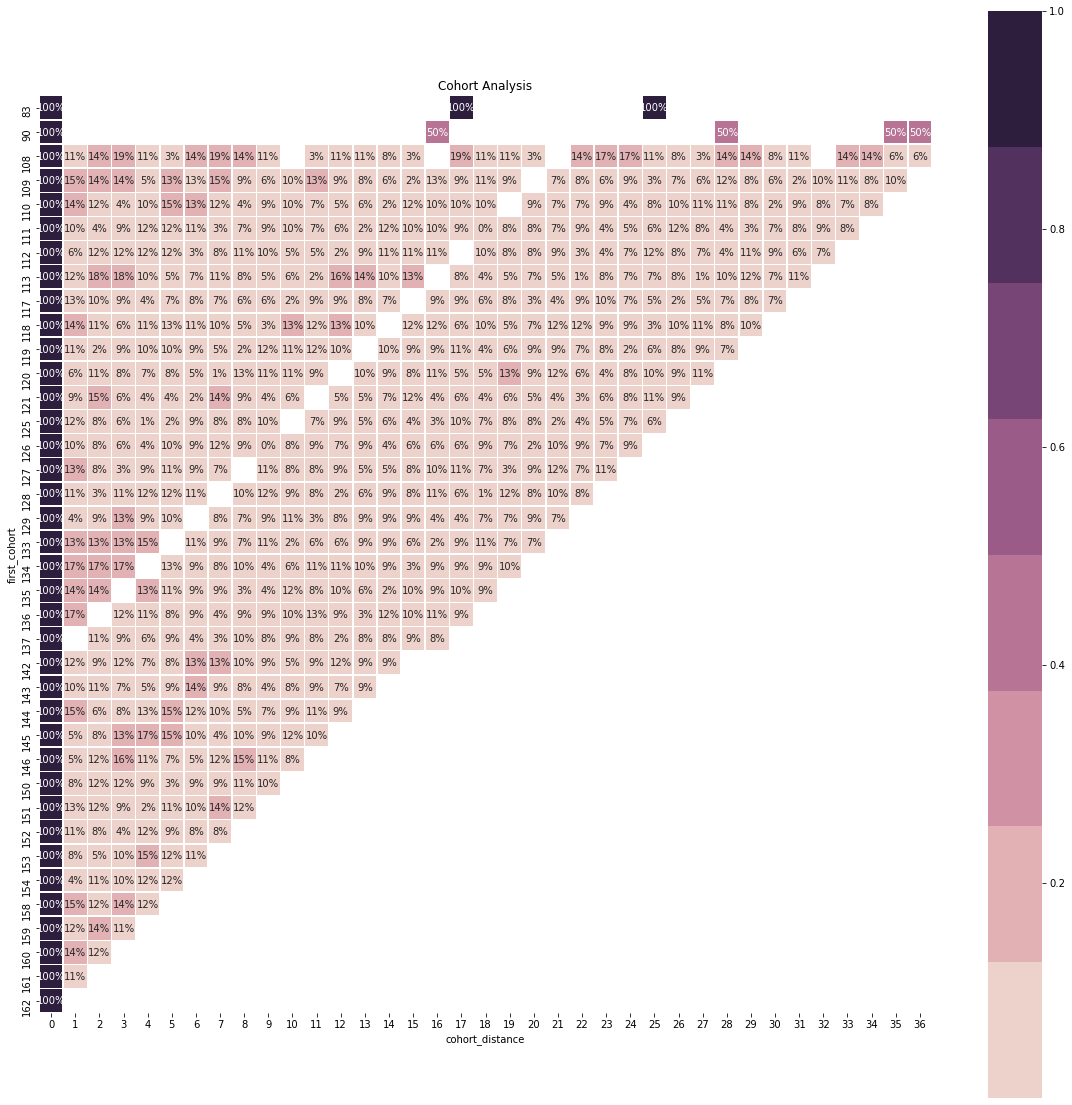

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
y_labels = [str(int(header)%100) + '-' + str(int(header)/100) for header in headers]
x_labels = range(0, len(y_labels))
plt.yticks(ticks=headers, labels=y_labels)
plt.xticks(x_labels, x_labels)
ax.set(xlabel='Weeks After First Purchase', ylabel='First Purchase Cohort', title="Cohort Analysis")
sns.heatmap(cohort_pivot, annot=True, fmt='.0%', mask=cohort_pivot.isnull(), ax=ax, square=True, linewidths=.5, cmap=sns.cubehelix_palette(8))

plt.show()